In [3]:
%load_ext rpy2.ipython

In [8]:
quakes_raw = []

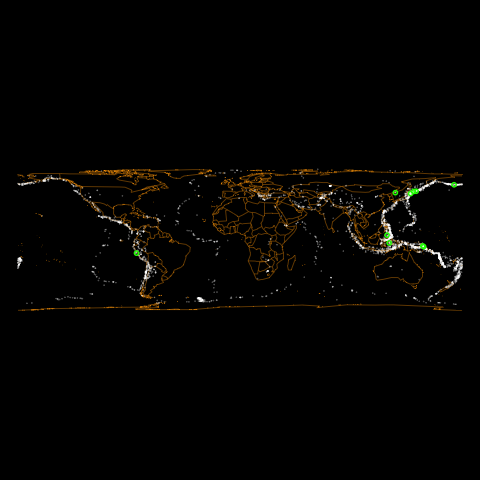

In [13]:
%%R -o quakes_raw
library(maps)
library(mapproj)

options(repr.plot.width = 4, repr.plot.height = 4)
 
# Load data
quakes <- read.csv('http://datasets.flowingdata.com/earthquakes1974.csv')
quakes_raw <- quakes

# Draw map
par(mar=c(0,0,0,0))
map("world", col="orange", bg="#000000", fill=FALSE, interior=TRUE, lwd=0.5, projection="cylequalarea", par=0, wrap=TRUE)
 
# Add points
ptsproj <- mapproject(quakes$longitude, quakes$latitude)
points(ptsproj, pch=20, cex=0.15, col="#ffffff40")
 
# Circle the highest magnitude quakes
quakes.o <- quakes[order(quakes$mag, decreasing=TRUE),]
majorpts <- mapproject(quakes.o$longitude[1:10], quakes.o$latitude[1:10])
symbols(majorpts, circles=rep(0.03, 10), add=TRUE, inches=FALSE, fg="green", lwd=2)

In [24]:
quakes_raw.loc[1,]

time               1974-04-14T21:48:21.900Z
latitude                            -20.898
longitude                           168.672
depth                                     4
mag                                     5.4
magType                                  mb
nst                             -2147483648
gap                             -2147483648
dmin                            -2147483648
rms                             -2147483648
net                                     pde
id                   pde19740414214821900_4
updated            2013-02-08T21:36:41.821Z
place        Loyalty Islands, New Caledonia
type                             earthquake
Name: 1, dtype: object